In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


df = pd.read_csv("dataset/ndvi-lluvia-tmin-tmax.csv")
df.head()

,anio,mes,ADM2_PCODE,departamento,municipio,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,date,tdelta
0,2002,7,GT0100,Guatemala,Lago De Amatitlan,1.0,0.686067,100.902100,-90.548878,14.435029,169.31514,16.139826,25.118555,2002-07-11,8.978729
1,2002,7,GT0101,Guatemala,Guatemala,6.0,0.586433,101.562333,-90.479418,14.635431,191.59773,15.752864,25.048338,2002-07-11,9.295474
2,2002,7,GT0102,Guatemala,Santa Catarina Pinula,2.0,0.707967,101.330167,-90.465079,14.564392,186.14903,14.537229,23.773886,2002-07-11,9.236657
3,2002,7,GT0103,Guatemala,San José Pinula,5.0,0.796333,100.334500,-90.346363,14.554316,199.11770,11.996284,20.399480,2002-07-11,8.403196
4,2002,7,GT0104,Guatemala,San José del Golfo,2.0,0.774200,98.992867,-90.372463,14.793193,135.58841,19.454800,28.777624,2002-07-11,9.322824


In [78]:
### SIN LONGITUD Y LATITUD

df_cluster = df.drop(['anio',"mes","ADM2_PCODE","departamento","municipio","n_pixels","date","lon","lat"], axis=1 )
df_norm = (df_cluster - df_cluster.min())/(df_cluster.max()-df_cluster.min())

,vim,viq,precipitacion,tmin,tmax,tdelta
0,0.679925,0.487682,0.129600,0.536784,0.499747,0.332500
1,0.524717,0.500492,0.146656,0.527047,0.497437,0.345029
2,0.714041,0.495987,0.142485,0.496458,0.455504,0.342703
3,0.851698,0.476669,0.152412,0.432520,0.344479,0.309734
4,0.817219,0.450638,0.103784,0.620198,0.620138,0.346111
...,...,...,...,...,...,...
81259,0.708017,0.624075,0.003922,0.562254,0.705815,0.540207
81260,0.773704,0.584962,0.003897,0.674850,0.814755,0.494176
81261,0.771991,0.615171,0.002029,0.658245,0.834802,0.544380
81262,0.872884,0.530077,0.000761,0.466115,0.564001,0.520841


c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\clust

,vim,viq,precipitacion,tmin,tmax,tdelta
0,0.679925,0.487682,0.129600,0.536784,0.499747,0.332500
1,0.524717,0.500492,0.146656,0.527047,0.497437,0.345029
2,0.714041,0.495987,0.142485,0.496458,0.455504,0.342703
3,0.851698,0.476669,0.152412,0.432520,0.344479,0.309734
4,0.817219,0.450638,0.103784,0.620198,0.620138,0.346111
...,...,...,...,...,...,...
81259,0.708017,0.624075,0.003922,0.562254,0.705815,0.540207
81260,0.773704,0.584962,0.003897,0.674850,0.814755,0.494176
81261,0.771991,0.615171,0.002029,0.658245,0.834802,0.544380
81262,0.872884,0.530077,0.000761,0.466115,0.564001,0.520841


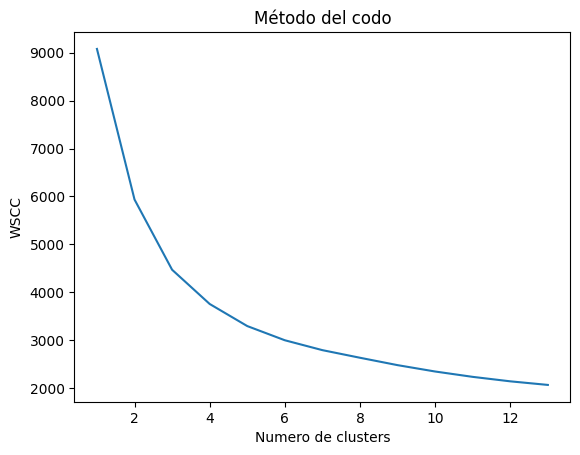

In [79]:
wscc = [] #Within cluster sum of squares 

for i in range(1,14):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_norm) #Aplicamos KMeans a los datos
    wscc.append(kmeans.inertia_)

plt.plot(range(1,14), wscc)
plt.title("Método del codo")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC")

df_norm

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

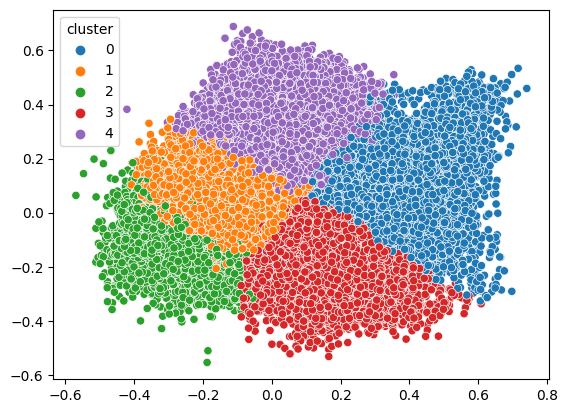

In [151]:
clustering = KMeans(n_clusters = 5, max_iter = 300) #Creamos el modelo
clustering.fit(df_norm) #Aplica el modelo a los datos

df["cluster"] = clustering.labels_

from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #Grafico de dos dimensiones
pca_fit = pca.fit_transform(df_norm) #Obtenemos los componentes principales

sns.scatterplot(x=pca_fit[:,0], y=pca_fit[:,1], hue=df.cluster, palette="tab10")



In [147]:
import geopandas

df["cluster"] = "C"+df["cluster"].astype(str)

clusters_municipios = df.groupby("ADM2_PCODE").agg(lambda x: x.mode().iloc[0])

gt = geopandas.read_file("dataset/gtm_adm_ocha_conred_2019_SHP/gtm_admbnda_adm2_ocha_conred_20190207.shp")
gt = gt[["ADM2_PCODE", "geometry"]]
clusters_municipios = gt.merge(clusters_municipios, "outer", on="ADM2_PCODE")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

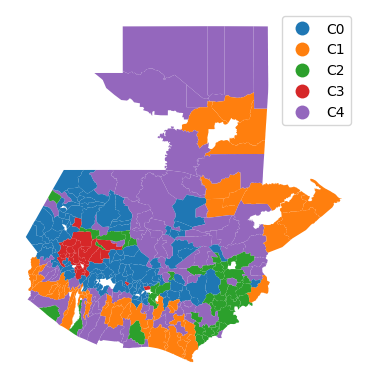

In [142]:
clusters_municipios.plot(column="cluster", categorical=True, legend=True, cmap = "tab10", vmax=10)
plt.axis("off")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

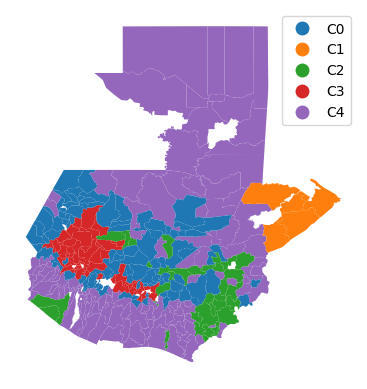

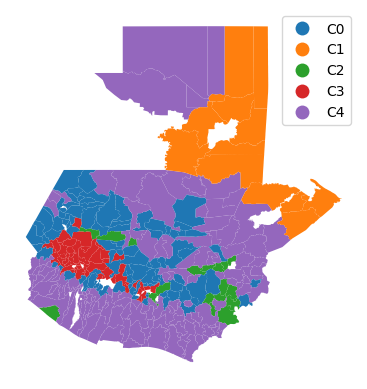

In [143]:
df_1 = df[(df['anio'] == 2002) & (df['mes'] == 12)]
df_2 = df[(df['anio'] == 2023) & (df['mes'] == 12)]

df_1 = gt.merge(df_1, "outer", on="ADM2_PCODE")
df_2 = gt.merge(df_2, "outer", on="ADM2_PCODE")

df_1.plot(column="cluster", categorical=True, legend=True,  cmap = "tab10", vmax=10)
plt.axis("off")
df_2.plot(column="cluster", categorical=True, legend=True,  cmap = "tab10", vmax=10)
plt.axis("off")

<Axes: xlabel='vim', ylabel='cluster'>

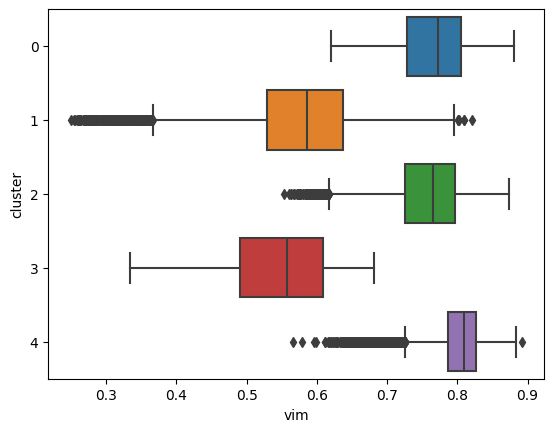

In [104]:
sns.set_palette
sns.boxplot(df, x="vim", y="cluster", orient="h", palette="tab10")

<Axes: xlabel='precipitacion', ylabel='cluster'>

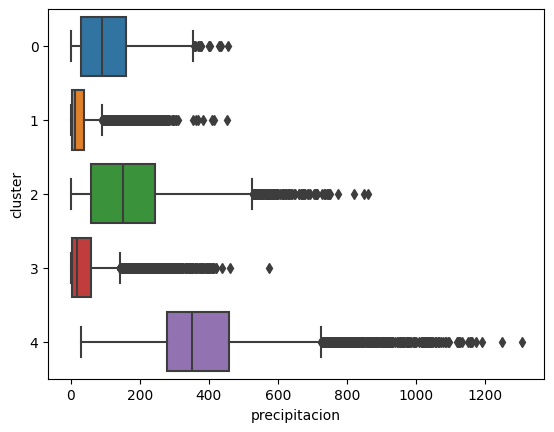

In [94]:
sns.boxplot(df, x="precipitacion", y="cluster", orient="h")

<Axes: xlabel='tmin', ylabel='cluster'>

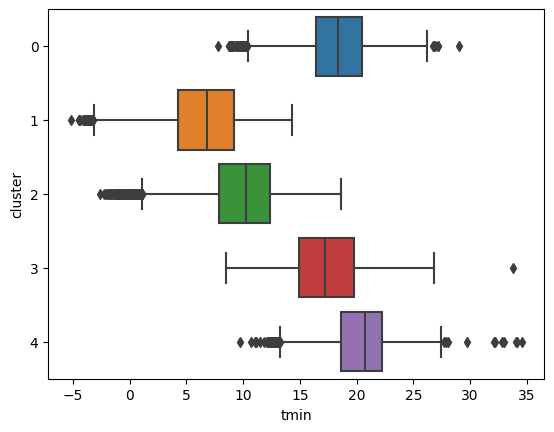

In [96]:
sns.boxplot(df, x="tmin", y="cluster", orient="h")

<Axes: xlabel='tmax', ylabel='cluster'>

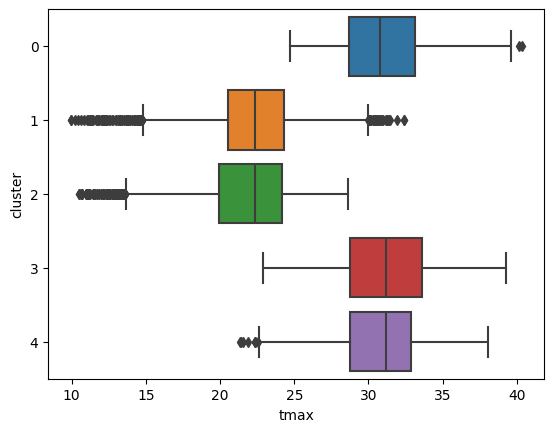

In [97]:
sns.boxplot(df, x="tmax", y="cluster", orient="h")